# Best response region ($Δ^1$)

In [136]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from ipywidgets import Output
from ipywidgets import Layout
import numpy as np

In [137]:
def index_helper(array, value):
    for i in range(len(array)):
        if array[i] == value:
            return i
    return -1

def find_last_index(array, value):
    for i in range(len(array)-1, -1, -1):
        if array[i] == value:
            return i
    return -1

In [138]:
# Define a function that updates the utility matrices when the slider value changes
def update_utility_matrices(e):
    
    # Define game here
    global U1, U2
    U1 = [[1,0], [0,e]]
    U2 = [[1,0], [0,e]]
    I = ["a1", "a2"]
    P = [1, 2]
    # ----------------
    
    p = np.linspace(0,1,100) # probability of player 1 to play a1
    # expected utility of player 2 when playing a1 against mixed strategy of player 1
    EU2_a1 = np.zeros(100)
    EU2_a2 = np.zeros(100)
    for i in range(100):
        EU2_a1[i] = p[i]*U2[0][0] + (1-p[i])*U2[1][0]
        EU2_a2[i] = p[i]*U2[0][1] + (1-p[i])*U2[1][1]
    
    q = np.linspace(0,1,100) # probability of player 2 to play a1
    # expected utility of player 1 when playing a1 against mixed strategy of player 2
    EU1_a1 = np.zeros(100)
    EU1_a2 = np.zeros(100)
    for i in range(100):
        EU1_a1[i] = q[i]*U1[0][0] + (1-q[i])*U1[1][0]
        EU1_a2[i] = q[i]*U1[0][1] + (1-q[i])*U1[1][1]
        
    # plot the expected utility of player 2 when playing a1 against mixed strategy of player 1
    with plot_response_2_against_1:
        plot_response_2_against_1.clear_output()
        plt.figure()
        plt.title("Best response of player 2 against mixed strategy of player 1")
        plt.plot(p, EU2_a1, label="EU2(a1)")
        plt.plot(p, EU2_a2, label="EU2(a2)")
        plt.xlabel("\sigma_1(a1)")
        plt.ylabel("EU2")
        plt.legend()
        plt.show()
        
    with plot_response_1_against_2:
        plot_response_1_against_2.clear_output()
        plt.figure()
        plt.title("Best response of player 1 against mixed strategy of player 2")
        plt.plot(q, EU1_a1, label="EU1(a1)")
        plt.plot(q, EU1_a2, label="EU1(a2)")
        plt.xlabel("\sigma_2(a1)")
        plt.ylabel("EU1")
        plt.legend()
        plt.show()
    
    # For each point in the mixed strategy space of player 1, find the best response of player 2
    best_response_2 = []
    for i in range(100):
        if EU2_a1[i] > EU2_a2[i]:
            best_response_2.append(0)
        elif EU2_a1[i] < EU2_a2[i]:
            best_response_2.append(1)
        else:
            best_response_2.append(0.5)

    # For each point in the mixed strategy space of player 2, find the best response of player 1
    best_response_1 = []
    for i in range(100):
        if EU1_a1[i] > EU1_a2[i]:
            best_response_1.append(0)
        elif EU1_a1[i] < EU1_a2[i]:
            best_response_1.append(1)
        else:
            best_response_1.append(0.5)
    
    # Display the best responses in loading bar
    if best_response_2[0] == 0:
        label_progress_bar_1.value = "Blue is payer 2 plays a1"
        last_index_of__ = find_last_index(best_response_2, 0)
    else:
        label_progress_bar_1.value = "Blue is payer 2 plays a2"
        last_index_of__ = find_last_index(best_response_2, 1)
    
    simplex_1_best_response_2_against_1.value = best_response_2.index(0.5) if index_helper(best_response_2, 0.5)  != -1 else last_index_of__
    
    if best_response_1[0] == 0:
        label_progress_bar_2.value = "Blue is payer 1 plays a1"
        last_index_of__ = find_last_index(best_response_1, 0)
    else:
        label_progress_bar_2.value = "Blue is payer 1 plays a2"
        last_index_of__ = find_last_index(best_response_1, 1)
    simplex_1_best_response_1_against_2.value = best_response_1.index(0.5) if index_helper(best_response_1, 0.5) != -1 else last_index_of__

    


# Create widgets
# label_utility = widgets.Textarea()
# label_strategy = widgets.Textarea()
plot_response_2_against_1 = Output()
plot_response_1_against_2 = Output()
label_progress_bar_1 = widgets.Label()
Layout = widgets.Layout(width='550px')
simplex_1_best_response_2_against_1 = widgets.FloatProgress(
    value=0,
    min=0,
    max=100,
    step=1,
    description='\sigma_1(a1):',
    bar_style='info',
    orientation='horizontal',
    layout=Layout
)
label_progress_bar_2 = widgets.Label()
simplex_1_best_response_1_against_2 = widgets.FloatProgress(
    value=0,
    min=0,
    max=100,
    step=1,
    description='\sigma_2(a1):',
    bar_style='info',
    orientation='horizontal',
    layout=Layout
)


# Display widgets
# display(label_utility)
# display(label_strategy)
display(plot_response_2_against_1)
display(label_progress_bar_1)
display(simplex_1_best_response_2_against_1)
print()
display(plot_response_1_against_2)
display(label_progress_bar_2)
display(simplex_1_best_response_1_against_2)

# Create a slider
e_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=100.0,
    step=0.1,
    description='e:',
    continuous_update=False
)

# Display the slider
display(e_slider)

# Update the utility matrices whenever the slider value changes
e_slider.observe(lambda change: update_utility_matrices(change['new']), names='value')

Output()

Label(value='')

FloatProgress(value=0.0, bar_style='info', description='\\sigma_1(a1):', layout=Layout(width='550px'))

Output()

Label(value='')

FloatProgress(value=0.0, bar_style='info', description='\\sigma_2(a1):', layout=Layout(width='550px'))

FloatSlider(value=0.0, continuous_update=False, description='e:')

# Best response region (Δ^2)

🎉Nashpy has come to solve us all🎉 

In [139]:
import nashpy as nash
import numpy as np

In [140]:
def is_in_list(lst, element):
    for x in lst:
        if np.array_equal(x, element):
            return True
    return False

In [141]:
# Game
U1 = [[3,0,1], 
    [2,2,0],
    [0,3,2]]

U2 = [[1,0,2], 
    [2,1,0],
    [0,2,1]]

In [142]:
# Equilibriums found by lemke howson
game = nash.Game(U1, U2)

equilibria = game.lemke_howson_enumeration()

equilibriums = []

for eq in equilibria:
    equilibriums.append(eq)
    
# Compare element in equilibriums and only keep the unique ones
unique_equilibriums = []
for eq in equilibriums:
    eq_tuple = tuple(eq)
    if not is_in_list(unique_equilibriums, eq_tuple):
        unique_equilibriums.append(eq_tuple)
        
# Display equilibriums
print("Equilibriums:")
for i, eq in enumerate(unique_equilibriums, 1):
    print(f"Equilibrium {i}:")
    for j, row in enumerate(eq, 1):
        print(f"  Player {j}: {row}")
    print()

Equilibriums:
Equilibrium 1:
  Player 1: [0. 0. 1.]
  Player 2: [0. 1. 0.]

Equilibrium 2:
  Player 1: [0.33333333 0.33333333 0.33333333]
  Player 2: [0.41666667 0.33333333 0.25      ]



But we really want is the vertices for the challenge right!!!

In [143]:
# Player 1's best response polytope
U1 = np.array(U1)
number_of_row_strategies, row_dimension = U1.shape
max_label = number_of_row_strategies + row_dimension

halfspaces_player_1 = nash.polytope.build_halfspaces(U1)
vertices = nash.polytope.non_trivial_vertices(halfspaces_player_1)

vertex_in_player_2_space = []

for row_v, row_l in vertices:
    adjusted_row_l = set(
            (label + number_of_row_strategies) % (max_label) for label in row_l
        )
    
    vertex_in_player_2_space.append([np.around(row_v/sum(row_v), 2) ,adjusted_row_l])
    
# Show the vertices in player 2's space
print("Vertices in player 2's space:")
for i, (v, l) in enumerate(vertex_in_player_2_space, 1):
    print(f"Vertex {i}:")
    print(f"  Vertex: {v}")
    print(f"  Labels: {l}")
    print()

Vertices in player 2's space:
Vertex 1:
  Vertex: [ 1. -0.  0.]
  Labels: {1, 2, 3}

Vertex 2:
  Vertex: [0.67 0.33 0.  ]
  Labels: {2, 3, 4}

Vertex 3:
  Vertex: [-0.  0.  1.]
  Labels: {0, 1, 5}

Vertex 4:
  Vertex: [0.25 0.   0.75]
  Labels: {1, 3, 5}

Vertex 5:
  Vertex: [0.42 0.33 0.25]
  Labels: {3, 4, 5}

Vertex 6:
  Vertex: [-0.  1. -0.]
  Labels: {0, 2, 5}

Vertex 7:
  Vertex: [ 0.33  0.67 -0.  ]
  Labels: {2, 4, 5}



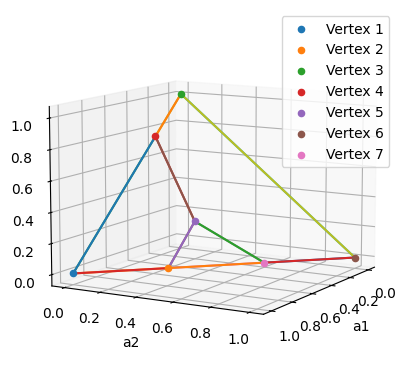

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, (v, l) in enumerate(vertex_in_player_2_space, 1):
    ax.scatter(v[0], v[1], v[2], label=f"Vertex {i}")
    for j, (v2, l2) in enumerate(vertex_in_player_2_space, 1):
        if len(l.intersection(l2)) > 1:
            ax.plot([v[0], v2[0]], [v[1], v2[1]], [v[2], v2[2]])
ax.view_init(elev=10, azim=30)
ax.set_xlabel('a1')
ax.set_ylabel('a2')
ax.set_zlabel('a3')
plt.legend()
plt.show()

In [145]:
# Player 1's best response polytope
U2 = np.array(U2)
number_of_row_strategies, row_dimension = U1.shape
max_label = number_of_row_strategies + row_dimension

halfspaces_player_2 = nash.polytope.build_halfspaces(U2)
vertices = nash.polytope.non_trivial_vertices(halfspaces_player_2)

vertex_in_player_1_space = []

for row_v, row_l in vertices:
    adjusted_row_l = set(
            (label + number_of_row_strategies) % (max_label) for label in row_l
        )
    
    vertex_in_player_1_space.append([np.around(row_v/sum(row_v), 2) ,adjusted_row_l])
    
# Show the vertices in player 1's space
print("Vertices in player 1's space:")
for i, (v, l) in enumerate(vertex_in_player_1_space, 1):
    print(f"Vertex {i}:")
    print(f"  Vertex: {v}")
    print(f"  Labels: {l}")
    print()

Vertices in player 1's space:
Vertex 1:
  Vertex: [1. 0. 0.]
  Labels: {1, 2, 4}

Vertex 2:
  Vertex: [-0.  0.  1.]
  Labels: {0, 1, 3}

Vertex 3:
  Vertex: [0.67 0.   0.33]
  Labels: {1, 3, 4}

Vertex 4:
  Vertex: [-0.    0.33  0.67]
  Labels: {0, 3, 5}

Vertex 5:
  Vertex: [0.33 0.33 0.33]
  Labels: {3, 4, 5}

Vertex 6:
  Vertex: [-0.  1. -0.]
  Labels: {0, 2, 5}

Vertex 7:
  Vertex: [ 0.33  0.67 -0.  ]
  Labels: {2, 4, 5}



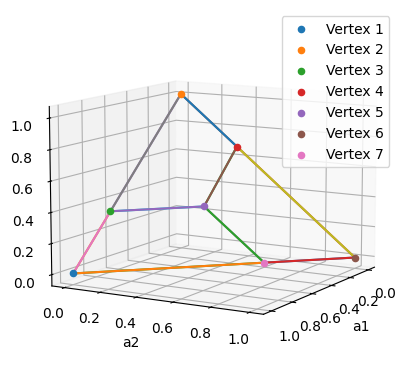

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, (v, l) in enumerate(vertex_in_player_1_space, 1):
    ax.scatter(v[0], v[1], v[2], label=f"Vertex {i}")
    for j, (v2, l2) in enumerate(vertex_in_player_1_space, 1):
        if len(l.intersection(l2)) > 1:
            ax.plot([v[0], v2[0]], [v[1], v2[1]], [v[2], v2[2]])
ax.view_init(elev=10, azim=30)
ax.set_xlabel('a1')
ax.set_ylabel('a2')
ax.set_zlabel('a3')
plt.legend()
plt.show()

## Now, let's make it interactive

In [147]:
def update_utility_matrices_2(e):
    
    # Define game here
    global U1, U2
    U1 = [[3,0,1], 
        [2,2,0],
        [0,3,e]]

    U2 = [[1,0,2], 
        [2,1,0],
        [0,2,e]]
    # ----------------
    
    # Player 1 computation
    U1 = np.array(U1)
    number_of_row_strategies, row_dimension = U1.shape
    max_label = number_of_row_strategies + row_dimension
    halfspaces_player_1 = nash.polytope.build_halfspaces(U1)
    vertices = nash.polytope.non_trivial_vertices(halfspaces_player_1)
    vertex_in_player_2_space = []
    for row_v, row_l in vertices:
        adjusted_row_l = set(
                (label + number_of_row_strategies) % (max_label) for label in row_l
            )
        vertex_in_player_2_space.append([np.around(row_v/sum(row_v), 2) ,adjusted_row_l])
    
    # Player 2 computation
    U2 = np.array(U2)
    number_of_row_strategies, row_dimension = U1.shape
    max_label = number_of_row_strategies + row_dimension

    halfspaces_player_2 = nash.polytope.build_halfspaces(U2)
    vertices = nash.polytope.non_trivial_vertices(halfspaces_player_2)

    vertex_in_player_1_space = []

    for row_v, row_l in vertices:
        adjusted_row_l = set(
                (label + number_of_row_strategies) % (max_label) for label in row_l
            )
        
        vertex_in_player_1_space.append([np.around(row_v/sum(row_v), 2) ,adjusted_row_l])
        
    
    with plot_response_2_against_1_mixed_strategy:
        plot_response_2_against_1_mixed_strategy.clear_output()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i, (v, l) in enumerate(vertex_in_player_2_space, 1):
            ax.scatter(v[0], v[1], v[2], label=f"Vertex {i}")
            for j, (v2, l2) in enumerate(vertex_in_player_2_space, 1):
                if len(l.intersection(l2)) > 1:
                    ax.plot([v[0], v2[0]], [v[1], v2[1]], [v[2], v2[2]])
        ax.view_init(elev=10, azim=30)
        ax.set_xlabel('a1')
        ax.set_ylabel('a2')
        ax.set_zlabel('a3')
        plt.legend()
        plt.show()
    
    with plot_response_1_against_2_midex_strategy:
        plot_response_1_against_2_midex_strategy.clear_output()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i, (v, l) in enumerate(vertex_in_player_1_space, 1):
            ax.scatter(v[0], v[1], v[2], label=f"Vertex {i}")
            for j, (v2, l2) in enumerate(vertex_in_player_1_space, 1):
                if len(l.intersection(l2)) > 1:
                    ax.plot([v[0], v2[0]], [v[1], v2[1]], [v[2], v2[2]])
        ax.view_init(elev=10, azim=30)
        ax.set_xlabel('a1')
        ax.set_ylabel('a2')
        ax.set_zlabel('a3')
        plt.legend()
        plt.show()
        
    

plot_response_2_against_1_mixed_strategy = Output()
plot_response_1_against_2_midex_strategy = Output()

# Display widgets
display(plot_response_2_against_1_mixed_strategy)
print()
display(plot_response_1_against_2_midex_strategy)

# Create a slider
e_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=100.0,
    step=0.1,
    description='e:',
    continuous_update=False
)

# Display the slider
display(e_slider)

# Update the utility matrices whenever the slider value changes
e_slider.observe(lambda change: update_utility_matrices_2(change['new']), names='value')

Output()

Output()

FloatSlider(value=0.0, continuous_update=False, description='e:')